# Задание 3.1
В «Могортранс» поступила жалоба от пассажиров на плохую работу транспорта на диспетчерской станции «Черемушки» в период с 20:00 до 21:00. 
Суть жалобы состоит в том, что троллейбусы ходят не по расписанию и их приходится ждать очень долго на остановках. 
На предприятии «Мосгортранс» существует система регистрации времени прибытия троллейбусов, а также подсчета количества прибывших пассажиров на этих троллейбусах. 
Данные с системы регистрации 	приведены в файле “Статистика по троллейбусам”. Руководство предприятия поручило вам разобраться в ситуации и выяснить, чем же вызвана жалоба, а также провести развернутый анализ времени 
движения транспорта и пассажиропотока.
Требуется:
- найти причину жалобы, 
- выяснить характеристики, которыми характеризуется движение транспорта и пассажиропоток (числовые, графические, как по отдельным маршрутам троллейбусов, так и в совокупности) 

In [ ]:
# импортируем все библиотеки
import pandas as pd
from pandas import  to_datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import rcParams
import seaborn as sns

In [38]:
# Считываем данные
tab= pd.read_excel('Статистика по троллейбусам.xls')

In [40]:
## Так как рассматриваемый интервал - 1 час, выделим показатель - минута прибытия на станцию троллейбусов
tab['minutes'] = tab['Время прибытия'].map(lambda x: pd.datetime.strptime(str(x), '%H:%M:%S').minute)

# Удаляем ненужное поле(времени прибытия троллейбуса в формате HH:MM:SS)
tab.drop(['Время прибытия'], axis= 1, inplace=True)

## В последних местах ставим вместо 00--->60 минуту(это значит 21:00)
tab['minutes'][36] = 60
tab['minutes'][37] = 60

In [54]:
# номер троллейбуса и их количество прибытий на станцию в период с 20:00-21:00
tab['Номер троллейбуса'].value_counts()

31    16
27    13
51     9
Name: Номер троллейбуса, dtype: int64

In [62]:
#Выделяем таблицы по кажому номеру маршрута и выбираем показатели 'Количество человек', 'minutes'
aa = tab[tab['Номер троллейбуса'] ==31][['Количество человек', 'minutes']]
bb = tab[tab['Номер троллейбуса'] ==27][['Количество человек', 'minutes']]
cc =tab[tab['Номер троллейбуса'] ==51][['Количество человек', 'minutes']]

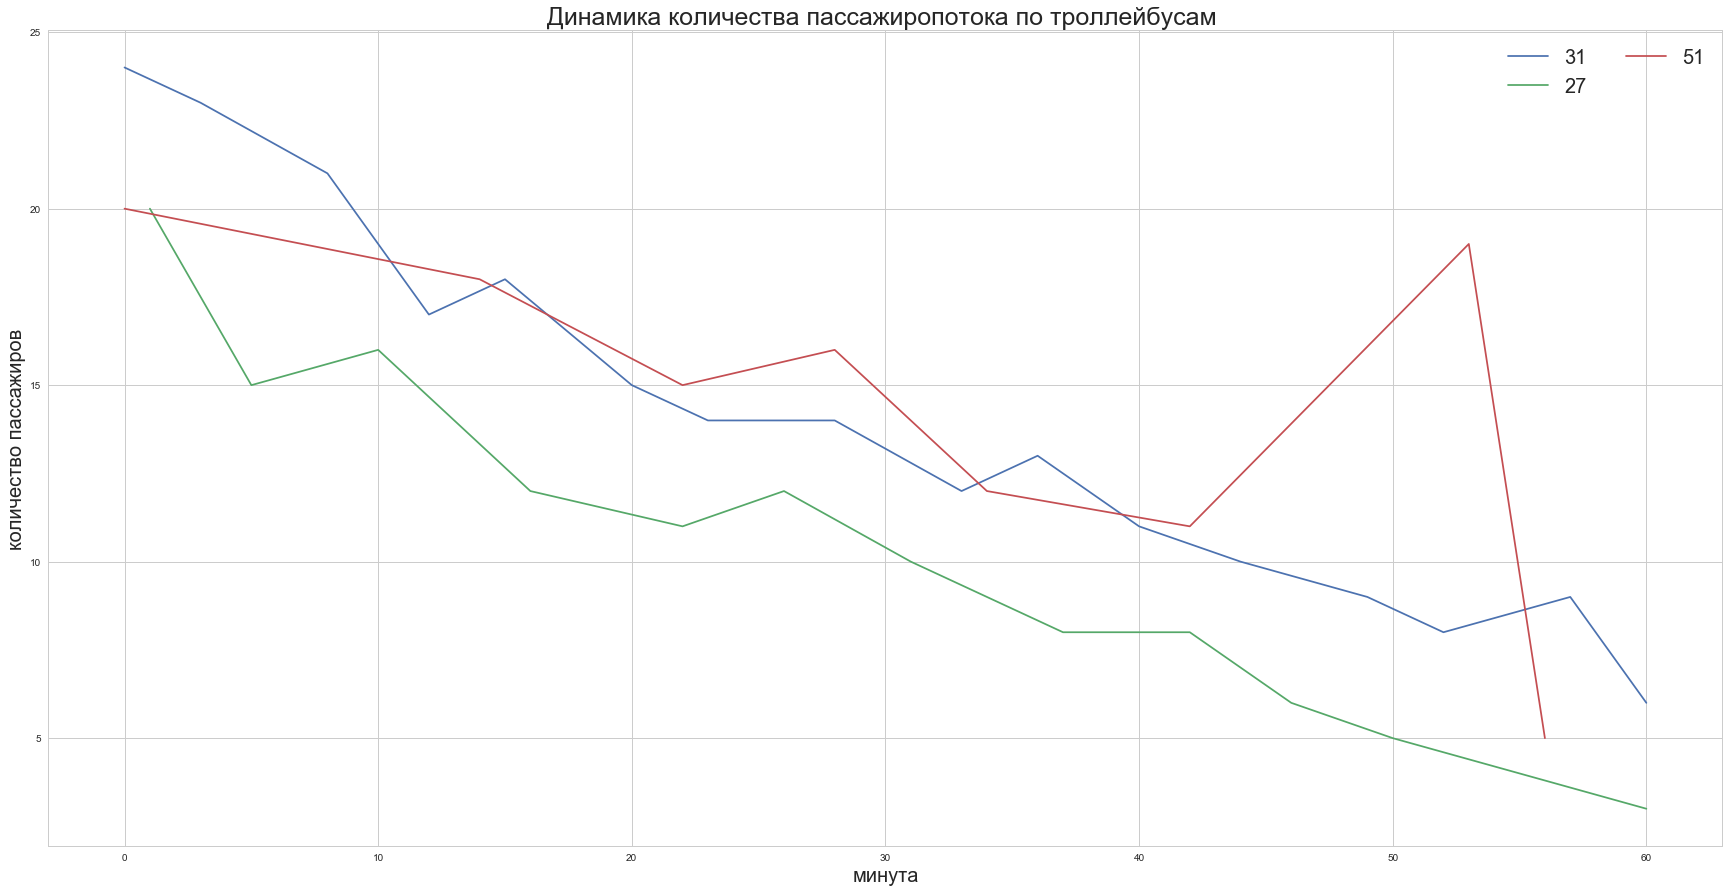

In [174]:
# Отрисовываем поминутную динамику количества пассажиров, приехавших на станцию для каждого троллейбуса
sns.set()
rcParams['figure.figsize'] = 30,15
sns.set_style("whitegrid")
plt.plot(aa['minutes'], aa['Количество человек'])
plt.legend('A', ncol=2, loc='upper right')
plt.plot(bb['minutes'], bb['Количество человек'])
plt.legend('B', ncol=2, loc='upper right')
plt.plot(cc['minutes'], cc['Количество человек'])
plt.legend(['31', '27', '51'], ncol=2, loc='upper right',fontsize=20 )

    
plt.xlabel('минута', fontsize=20)
plt.ylabel('количество пассажиров',  fontsize=20)
plt.title('Динамика количества пассажиропотока по троллейбусам ', fontsize=25)

In [96]:
## Создаем таблицу с количеством прибывших троллейбусов на станцию в каждую минуту
dd = pd.DataFrame(tab.groupby([ 'minutes'])['Номер троллейбуса'].count()).reset_index().rename(columns= {'Номер троллейбуса': 'Количество троллейбусов'})

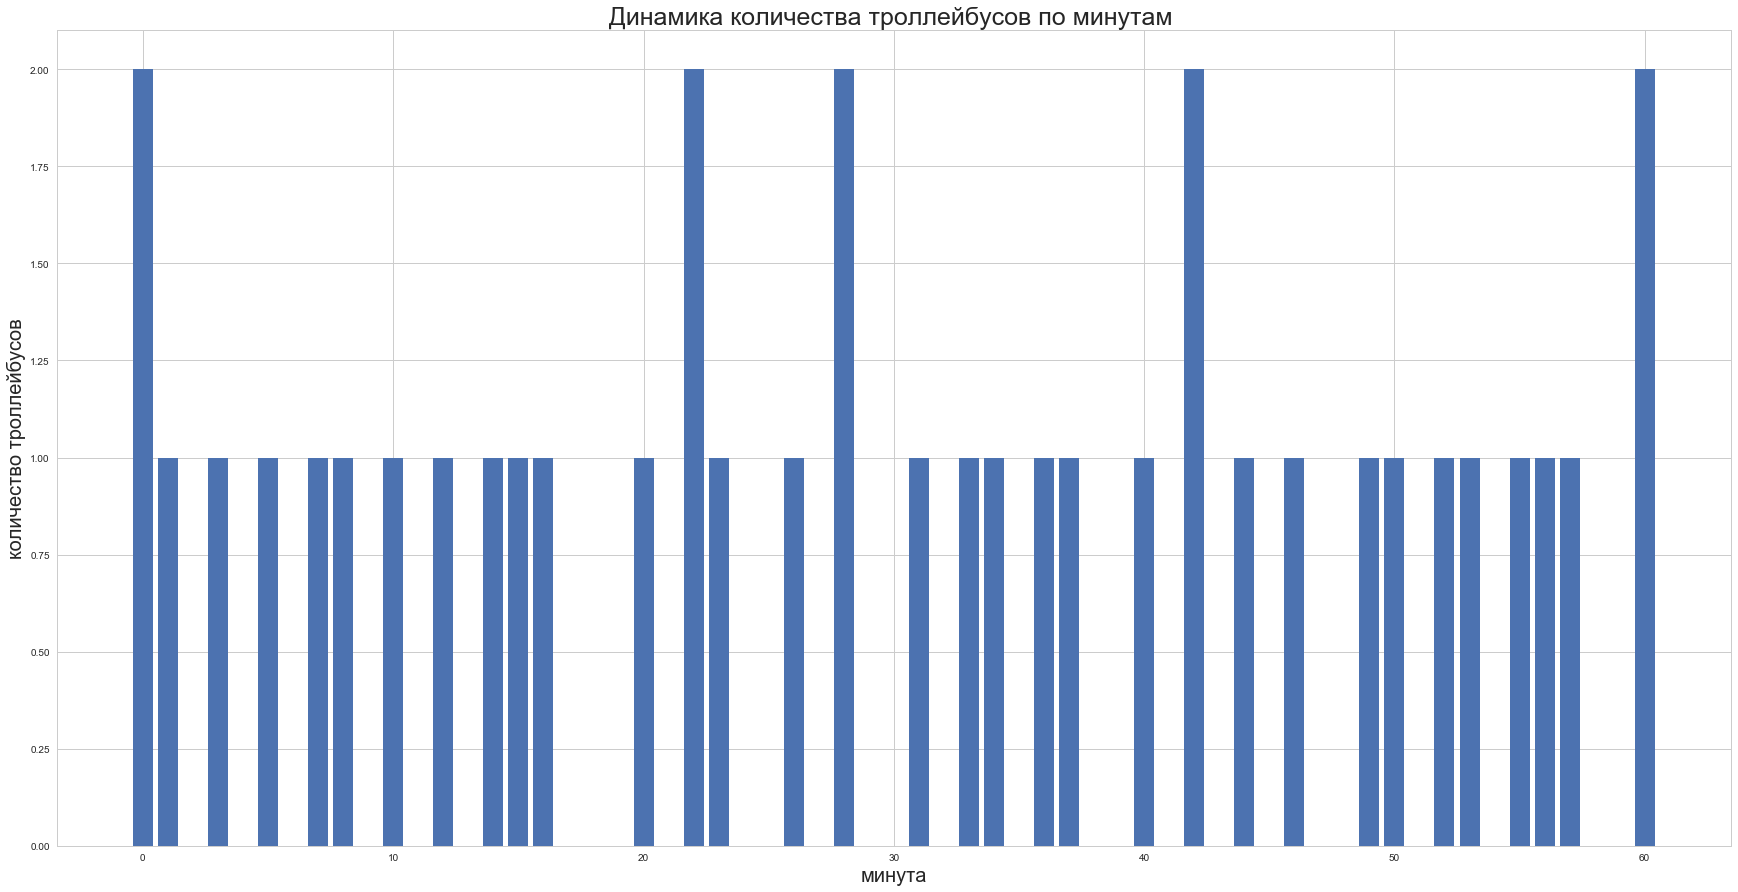

In [110]:
# Отрисовываем эту таблицу
import matplotlib.pyplot as plt

plt.bar(dd['minutes'].astype(int),dd['Количество троллейбусов'].astype(int),align='center') # A bar chart
plt.xlabel('минута' , fontsize=20)
plt.ylabel('количество троллейбусов', fontsize=20)

plt.title('Динамика количества троллейбусов по минутам ', fontsize=25)
plt.show()

In [196]:
# Средний интервал ожидания(в минутах) за 0-10, 10-20, 20-30 и т.д. минуты 
mean_aa= dict()
aa_v, bb_v, cc_v= [], [], []
mean_bb =dict()
mean_cc = dict()
for i in range(10, 70, 10): 
    if aa[(aa['minutes']<i)& (aa['minutes']>= i-10)]['minutes'].shape[0]==1:
        mean_aa[str(i-10)+ '_'+str(i)]=10
    else:
        mean_aa[str(i-10)+ '_'+str(i)] = aa[(aa['minutes']<i)& (aa['minutes']>= i-10)]['minutes'].sort_values(ascending = False).diff(-1).sum()/(aa[(aa['minutes']<i)& (aa['minutes']>= i-10)].shape[0]-1)
    
    if bb[(bb['minutes']<i)& (bb['minutes']>= i-10)]['minutes'].shape[0]==1:
        mean_bb[str(i-10)+ '_'+str(i)]=10
    else:
        mean_bb[str(i-10)+ '_'+str(i)] = bb[(bb['minutes']<i)& (bb['minutes']>= i-10)]['minutes'].sort_values(ascending = False).diff(-1).sum()/(bb[(bb['minutes']<i)& (bb['minutes']>= i-10)].shape[0]-1)
   
    if cc[(cc['minutes']<i)& (cc['minutes']>= i-10)]['minutes'].shape[0]==1:
        mean_cc[str(i-10)+ '_'+str(i)]=10
    else:
        mean_cc[str(i-10)+ '_'+str(i)] = cc[(cc['minutes']<i)& (cc['minutes']>= i-10)]['minutes'].sort_values(ascending = False).diff(-1).sum()/(cc[(cc['minutes']<i)& (cc['minutes']>= i-10)].shape[0]-1)
    
    
    aa_v.append(mean_aa[str(i-10)+ '_'+str(i)])
    bb_v.append(mean_bb[str(i-10)+ '_'+str(i)])
    cc_v.append(mean_cc[str(i-10)+ '_'+str(i)])

In [241]:
## вносим в таблицу для кадого троллейбуса среднее время ожидания по каждому интервалу
all_lists= [aa_v, bb_v, cc_v]
mean_by_minutes = pd.DataFrame(all_lists).T
mean_by_minutes['minutes'] = [key for key in ['0_10', '10_20', '20_30', '30_40',  '40_50', '50_60']]

In [242]:
mean_by_minutes.set_index('minutes', inplace=True)
mean_by_minutes = mean_by_minutes.rename(columns={0: '31', 1:'27', 2:'51'})

In [246]:
mean_by_minutes

,31,27,51
minutes,,,
0_10,4.0,4.0,7.0
10_20,3.0,6.0,10.0
20_30,4.0,4.0,6.0
30_40,3.0,6.0,10.0
40_50,4.5,4.0,10.0
50_60,5.0,5.0,3.0


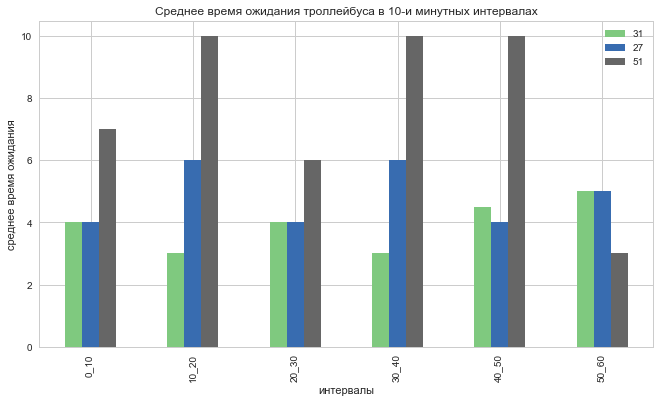

In [243]:
#отрисовка среднего времени ожидания в минутах по 10-и минутным интервалам
mean_by_minutes.plot(kind='bar', figsize=(11,6), align='center', colormap="Accent")
plt.xlabel('интервалы')
plt.ylabel('среднее время ожидания')
plt.title('Среднее время ожидания троллейбуса в 10-и минутных интервалах')

In [240]:
mean_by_minutes.reset_index().to_excel('mean_time.xls', index= False)